In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# Load clients dataset
df_clientes = pd.read_csv('../banvic/seeds/banvic/clientes.csv')
print(f"✅ Loaded {len(df_clientes):,} client records")

# Convert date columns with proper error handling
print("Converting date columns...")
df_clientes['data_inclusao'] = pd.to_datetime(df_clientes['data_inclusao'], format='mixed', errors='coerce')
df_clientes['data_nascimento'] = pd.to_datetime(df_clientes['data_nascimento'], format='mixed', errors='coerce')

# Verify datetime conversion
print(f"data_inclusao dtype: {df_clientes['data_inclusao'].dtype}")
print(f"data_nascimento dtype: {df_clientes['data_nascimento'].dtype}")
print(f"data_nascimento is datetime: {pd.api.types.is_datetime64_any_dtype(df_clientes['data_nascimento'])}")

# Make data_nascimento timezone-aware (assuming UTC if no timezone info)
if pd.api.types.is_datetime64_any_dtype(df_clientes['data_nascimento']):
    if df_clientes['data_nascimento'].dt.tz is None:
        df_clientes['data_nascimento'] = df_clientes['data_nascimento'].dt.tz_localize('UTC')
        print("✅ data_nascimento localized to UTC")
    else:
        df_clientes['data_nascimento'] = df_clientes['data_nascimento'].dt.tz_convert('UTC')
        print("✅ data_nascimento converted to UTC")
else:
    print("❌ data_nascimento is not a datetime column!")

print("✅ Date columns processed successfully")


✅ Loaded 998 client records
Converting date columns...
data_inclusao dtype: datetime64[ns, UTC]
data_nascimento dtype: datetime64[ns]
data_nascimento is datetime: True
✅ data_nascimento localized to UTC
✅ Date columns processed successfully


In [4]:
# Debug and fix data_nascimento column
print("Debugging data_nascimento column...")
print(f"Data type: {df_clientes['data_nascimento'].dtype}")
print(f"Sample values: {df_clientes['data_nascimento'].head()}")
print(f"Is datetime: {pd.api.types.is_datetime64_any_dtype(df_clientes['data_nascimento'])}")

# Force conversion to datetime if needed
if not pd.api.types.is_datetime64_any_dtype(df_clientes['data_nascimento']):
    print("Converting to datetime...")
    df_clientes['data_nascimento'] = pd.to_datetime(df_clientes['data_nascimento'], format='mixed', errors='coerce')
    print("✅ Converted to datetime")

# Now fix timezone
print("Fixing timezone for data_nascimento...")
if df_clientes['data_nascimento'].dt.tz is None:
    df_clientes['data_nascimento'] = df_clientes['data_nascimento'].dt.tz_localize('UTC')
    print("✅ Localized to UTC")
else:
    df_clientes['data_nascimento'] = df_clientes['data_nascimento'].dt.tz_convert('UTC')
    print("✅ Converted to UTC")

print(f"Final data type: {df_clientes['data_nascimento'].dtype}")
print(f"Timezone info: {df_clientes['data_nascimento'].dt.tz}")


Debugging data_nascimento column...
Data type: datetime64[ns, UTC]
Sample values: 0   2006-08-11 00:00:00+00:00
1   1995-10-11 00:00:00+00:00
2   1948-11-19 00:00:00+00:00
3   1978-01-27 00:00:00+00:00
4   1990-08-25 00:00:00+00:00
Name: data_nascimento, dtype: datetime64[ns, UTC]
Is datetime: True
Fixing timezone for data_nascimento...
✅ Converted to UTC
Final data type: datetime64[ns, UTC]
Timezone info: UTC


# Análise Descritiva - Clientes

In [5]:
print("\n👥 CLIENTES ANALYSIS")
print("=" * 50)

# Basic info
print("📋 Basic Information:")
print(f"   - Total clients: {len(df_clientes):,}")
print(f"   - Columns: {list(df_clientes.columns)}")
print(f"   - Missing values: {df_clientes.isnull().sum().sum()}")

# Convert date columns
df_clientes['data_inclusao'] = pd.to_datetime(df_clientes['data_inclusao'], format='mixed')
df_clientes['data_nascimento'] = pd.to_datetime(df_clientes['data_nascimento'], format='mixed')

# Make data_nascimento timezone-aware (assuming UTC if no timezone info)
if df_clientes['data_nascimento'].dt.tz is None:
    df_clientes['data_nascimento'] = df_clientes['data_nascimento'].dt.tz_localize('UTC')

# Client types
print(f"\n👤 Client Types:")
print(df_clientes['tipo_cliente'].value_counts())

# Age analysis
df_clientes['idade'] = (pd.Timestamp.now(tz='UTC') - df_clientes['data_nascimento']).dt.days // 365
print(f"\n🎂 Age Analysis:")
print(f"   - Average age: {df_clientes['idade'].mean():.1f} years")
print(f"   - Age range: {df_clientes['idade'].min()} - {df_clientes['idade'].max()} years")
print(f"   - Age distribution:")
print(df_clientes['idade'].describe())

# Registration timeline
print(f"\n📅 Registration Timeline:")
print(f"   - First registration: {df_clientes['data_inclusao'].min()}")
print(f"   - Latest registration: {df_clientes['data_inclusao'].max()}")
print(f"   - Registrations by year:")
print(df_clientes['data_inclusao'].dt.year.value_counts().sort_index())



👥 CLIENTES ANALYSIS
📋 Basic Information:
   - Total clients: 998
   - Columns: ['cod_cliente', 'primeiro_nome', 'ultimo_nome', 'email', 'tipo_cliente', 'data_inclusao', 'cpfcnpj', 'data_nascimento', 'endereco', 'cep']
   - Missing values: 0

👤 Client Types:
tipo_cliente
PF    998
Name: count, dtype: int64

🎂 Age Analysis:
   - Average age: 50.6 years
   - Age range: 18 - 83 years
   - Age distribution:
count    998.000000
mean      50.644289
std       18.775630
min       18.000000
25%       34.000000
50%       51.000000
75%       67.000000
max       83.000000
Name: idade, dtype: float64

📅 Registration Timeline:
   - First registration: 2010-02-02 14:28:00+00:00
   - Latest registration: 2022-12-27 13:30:00+00:00
   - Registrations by year:
data_inclusao
2010     11
2011     24
2012     32
2013     46
2014     48
2015     66
2016     74
2017     96
2018    102
2019    113
2020    112
2021    135
2022    139
Name: count, dtype: int64


# Visualizações

## Tipo de Clientes

Text(0, 0.5, '')

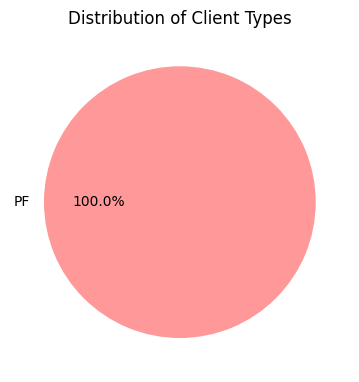

In [6]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
df_clientes['tipo_cliente'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Distribution of Client Types')
plt.ylabel('')

Obs: No presente projeto, nos dados de origem constam apenas clientes do tipo pessoa física. No entanto, as análises contendo o tipo de clientes serão incluídas caso futuras análises incluam bancos maiores com outros tipos de clientes.

## Distribuição por idade

Text(0, 0.5, 'Frequency')

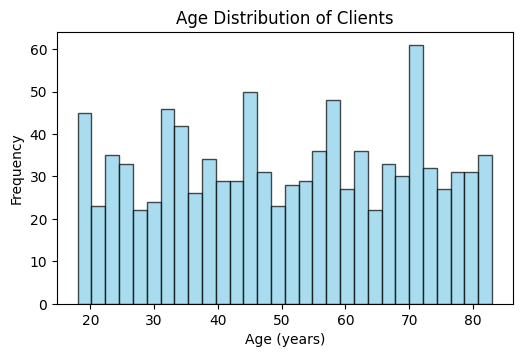

In [7]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 2)
plt.hist(df_clientes['idade'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Clients')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')

## Registro de clientes por tempo

Text(0, 0.5, 'Number of Registrations')

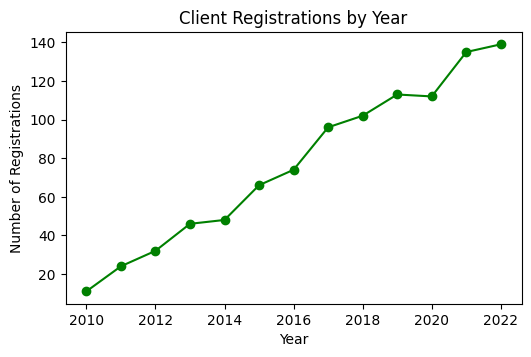

In [8]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 3)
df_clientes['data_inclusao'].dt.year.value_counts().sort_index().plot(kind='line', marker='o', color='green')
plt.title('Client Registrations by Year')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')

## Idade por tipo de cliente

Text(0.5, 0.98, '')

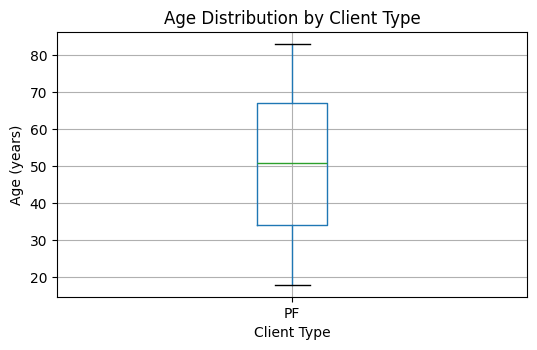

In [9]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 4)
df_clientes.boxplot(column='idade', by='tipo_cliente', ax=plt.gca())
plt.title('Age Distribution by Client Type')
plt.xlabel('Client Type')
plt.ylabel('Age (years)')
plt.suptitle('')  # Remove default title

## Registro de clientes por tempo por tipo

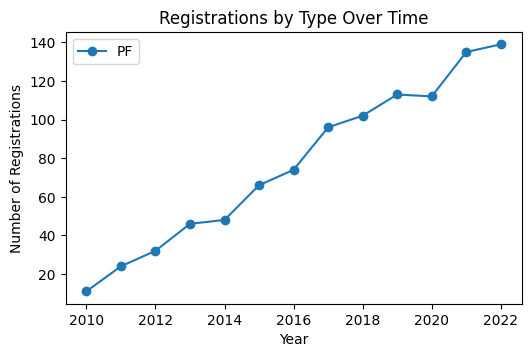

In [10]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 5)
for tipo in df_clientes['tipo_cliente'].unique():
    subset = df_clientes[df_clientes['tipo_cliente'] == tipo]
    subset['data_inclusao'].dt.year.value_counts().sort_index().plot(kind='line', marker='o', label=tipo)
plt.title('Registrations by Type Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.legend()


## Clientes por faixa etária

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '65+'),
  Text(1, 0, '26-35'),
  Text(2, 0, '56-65'),
  Text(3, 0, '36-45'),
  Text(4, 0, '46-55'),
  Text(5, 0, '18-25')])

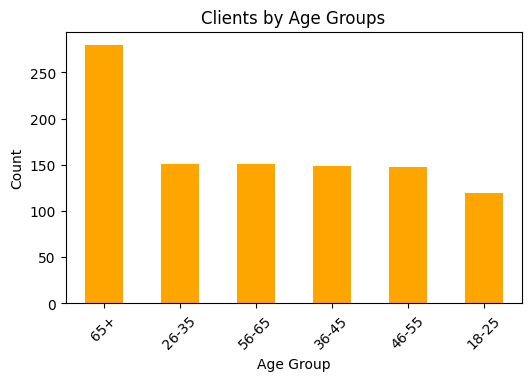

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 6)
age_groups = pd.cut(df_clientes['idade'], bins=[0, 25, 35, 45, 55, 65, 100], 
                   labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])
age_groups.value_counts().plot(kind='bar', color='orange')
plt.title('Clients by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)

## Registros de clientes mensais

C:\Users\guizsantos\AppData\Local\Temp\ipykernel_2256\1449844234.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_reg = df_clientes['data_inclusao'].dt.to_period('M').value_counts().sort_index()


(array([492, 516, 540, 564, 588, 612]),
 [Text(492, 0, '2011'),
  Text(516, 0, '2013'),
  Text(540, 0, '2015'),
  Text(564, 0, '2017'),
  Text(588, 0, '2019'),
  Text(612, 0, '2021')])

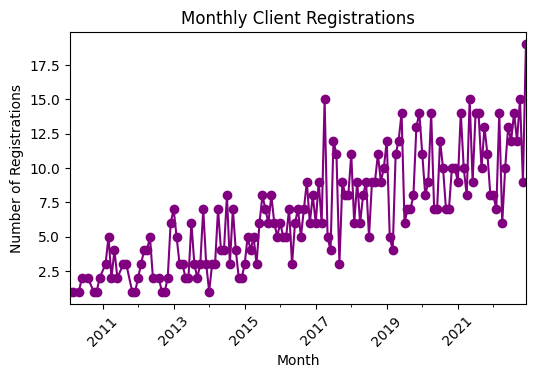

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 7)
monthly_reg = df_clientes['data_inclusao'].dt.to_period('M').value_counts().sort_index()
monthly_reg.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Client Registrations')
plt.xlabel('Month')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45)

## Principais domínios de e-mails dos clientes

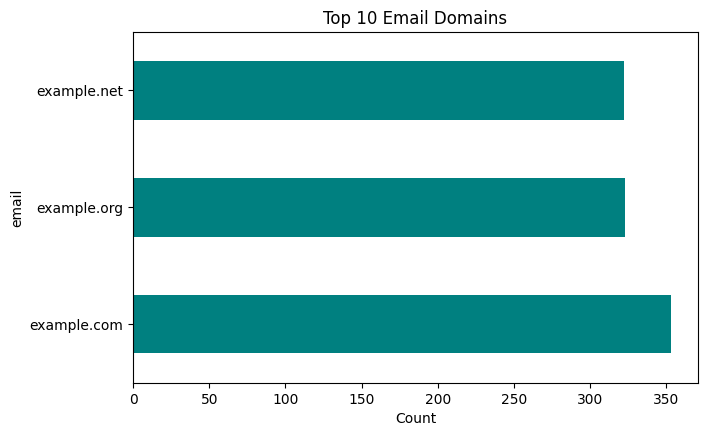

In [13]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 9)
email_domains = df_clientes['email'].str.split('@').str[1].value_counts().head(10)
email_domains.plot(kind='barh', color='teal')
plt.title('Top 10 Email Domains')
plt.xlabel('Count')

plt.tight_layout()
plt.show()


## Resumo

In [15]:
# Summary statistics
print(f"\n📊 Summary Statistics:")
print(f"   - Average age: {df_clientes['idade'].mean():.1f} years")
print(f"   - Most common client type: {df_clientes['tipo_cliente'].value_counts().index[0]}")
print(f"   - Most common email domain: {df_clientes['email'].str.split('@').str[1].value_counts().index[0]}")
print(f"   - Total unique clients: {len(df_clientes):,}")
print(f"   - Age range: {df_clientes['idade'].min()} - {df_clientes['idade'].max()} years")



📊 Summary Statistics:
   - Average age: 50.6 years
   - Most common client type: PF
   - Most common email domain: example.com
   - Total unique clients: 998
   - Age range: 18 - 83 years
